In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
# Read white wine data
white= pd.read_csv("winequality-white.csv", sep=';')

In [3]:
# Info of white wine
#print (white.info())

In [4]:
# first rows of 'white'
#white.head()

In [5]:
# take a sample of 5 rows of white
#white.sample(5)

In [6]:
# read red wine data
red= pd.read_csv("winequality-redd.csv", sep=';')

In [7]:
#print (red. info())

In [8]:
#red.head()

In [9]:
# describe red
#red.describe()

In [10]:
# check for the null values in red
#pd.isnull(red)

In [11]:
# add column to 'red' with value 1
red['type']= 1
# add column to white with value 0
white['type']= 0
# Append 'white' to red
wines= red.append(white, ignore_index= True)

In [12]:
print (wines.head(5))


In [13]:
#wines.info()

In [14]:
wines.shape

(6497, 13)

In [15]:
# describe wines
#wines.describe()

In [16]:
#wines.head(5)

Text(0.5,1.025,'correlation between red and white wine')

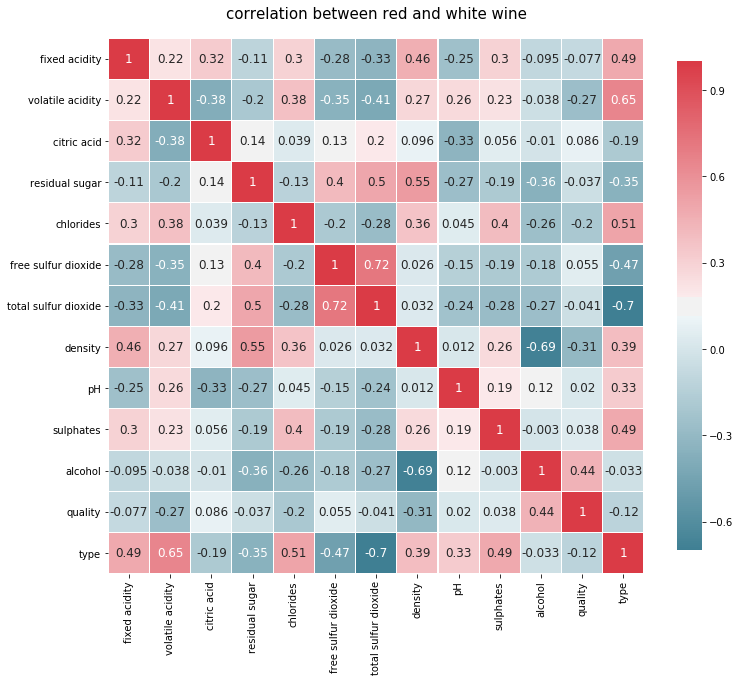

In [83]:
# Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr = wines.corr()
fig, ax = plt.subplots(figsize =(12, 10))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
fig= sns.heatmap(
    corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
)

plt.title('correlation between red and white wine',y=1.025, size=15)

# Predict the Alcohol level

# KN REgressor

In [18]:
#  Import libraries and modules
import numpy as np
import pandas as pd
# Using KNeighbors regressors to predict the alcohollevel of wine
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,svm

In [19]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [20]:
# Defining X and y
X= wines.iloc[:,:9]
y= wines['alcohol'].values

In [21]:
X.shape

(6497, 9)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)


In [23]:
# Standrized the data
scaler= StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [25]:
pred = reg.predict(X_test)
pred[:5]

array([ 9.56666667, 10.73333333,  8.96666667,  9.53333333, 11.06666667])

In [26]:
y_test[:5]

array([ 9.2, 11.2,  9. ,  9.3, 11. ])

In [27]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.77


In [28]:
print("Training set score: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(reg.score(X_test, y_test)))


Training set score: 0.89
Test set score: 0.77


In [29]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to wherever
neighbors_settings = list(range(1, 100))
for n_neighbors in neighbors_settings:
# build the model
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(reg.score(X_train, y_train))
# record generalization accuracy
    test_accuracy.append(reg.score(X_test, y_test))

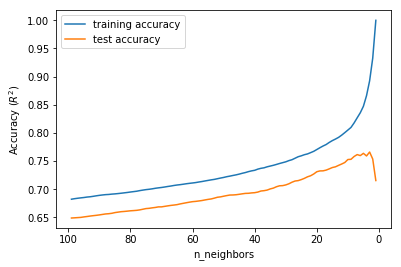

In [30]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy ($R^2$)")
plt.xlabel("n_neighbors")
plt.gca().invert_xaxis()
plt.legend()

# Using linear Regressor to predict the alcohol level

In [31]:
# Defining X and y
X1= wines.iloc[:,:9]
y1= wines['alcohol'].values

In [32]:
from sklearn.linear_model import LinearRegression
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)
clf= LinearRegression()


In [33]:
# Standrized the data
scaler= StandardScaler().fit(X1_train)
X1_train=scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [34]:
clf.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
prediction=clf.predict(X1_test)

In [36]:
prediction[:5]

array([12.16253037, 10.05364469, 11.9800737 ,  9.75384043,  8.86492875])

In [37]:
y1_test[:5]

array([12.2,  9.9, 12. ,  9.5,  8.9])

In [38]:
print("Training set score: {:.2f}".format(clf.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(clf.score(X1_test, y1_test)))

Training set score: 0.76
Test set score: 0.78


In [39]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(ridge.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(ridge.score(X1_test, y1_test)))

Training set score: 0.76
Test set score: 0.78


In [40]:
ridge01 = Ridge(alpha=0.01).fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(ridge01.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(ridge01.score(X1_test, y1_test)))

Training set score: 0.76
Test set score: 0.78


In [41]:
ridge10 = Ridge(alpha=10).fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(ridge10.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(ridge10.score(X1_test, y1_test)))

Training set score: 0.76
Test set score: 0.78


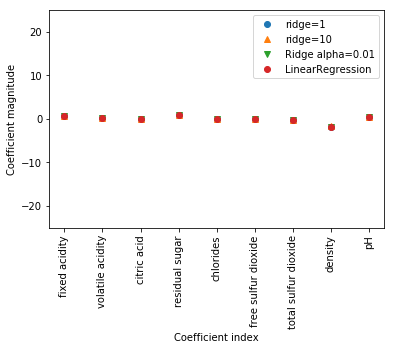

In [42]:
names= wines.columns
plt.plot(ridge.coef_.T, 'o', label="ridge=1")
plt.plot(ridge10.coef_.T, '^', label="ridge=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.01")
plt.plot(clf.coef_.T, 'o', label="LinearRegression")
plt.xticks(range(len(names)), names, rotation=90)
plt.hlines(0, 0, range(len(names)))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=100000).fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(lasso.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(lasso.score(X1_test, y1_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


In [44]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(lasso001.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(lasso001.score(X1_test, y1_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.76
Test set score: 0.78
Number of features used: 8


In [45]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(lasso00001.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X1_test, y1_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.76
Test set score: 0.78
Number of features used: 9


Text(0,0.5,'Coefficient magnitude')

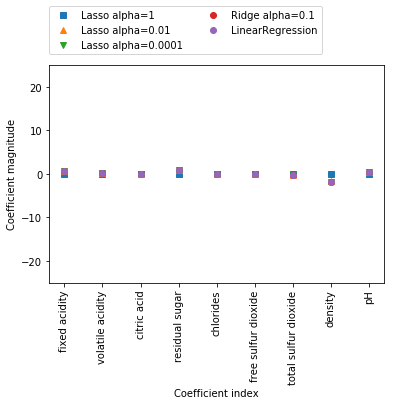

In [46]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.plot(clf.coef_.T, 'o', label="LinearRegression")
plt.xticks(range(len(names)-1), names, rotation=90)
plt.hlines(0, 0, range(len(names)-1))
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# Use binary classification to predict the type of wine.

In [47]:
import numpy as np
# Specify the data
Xb=wines.iloc[:,0:11]
#Specify the target leves
yb=np.array(wines.type)

In [48]:
#split the data up in test and train sets
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.33, random_state=42)

In [49]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
#Define the scaler
scaler= StandardScaler().fit(Xb_train)
#scale tha train
Xb_train = scaler.transform(Xb_train)
# Scale the test set
Xb_test = scaler.transform(Xb_test)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [51]:
model=LogisticRegression()
logreg = model.fit(Xb_train, yb_train)

In [52]:
y_pred=model.predict(Xb_test)

In [53]:
y_pred[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [54]:
yb_test[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [55]:
print("Training set score: {:.3f}".format(logreg.score(Xb_train, yb_train)))
print("Test set score: {:.3f}".format(logreg.score(Xb_test, yb_test)))

Training set score: 0.995
Test set score: 0.989


In [56]:
logreg100 = LogisticRegression(C=100).fit(Xb_train, yb_train)
print("Training set score: {:.3f}".format(logreg100.score(Xb_train, yb_train)))
print("Test set score: {:.3f}".format(logreg100.score(Xb_test, yb_test)))

Training set score: 0.995
Test set score: 0.991


In [57]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

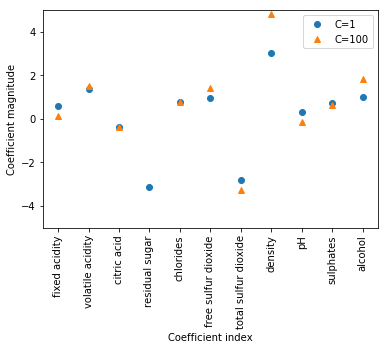

In [58]:
#visulazige the model
import matplotlib.pyplot as plt
%matplotlib inline
names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']

# Logistic Regression with L2 regularization
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.xticks(range(len(names)), names, rotation=90)
plt.hlines(0, 0, range(len(names)))
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

# Predict the wine quality

In [59]:
#Defining the splits for categories. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [1,4,6,10]
#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2]
wines['quality_categorical'] = pd.cut(wines['quality'], bins=bins, labels=quality_labels, include_lowest=True)
#Displays the first 2 columns
display(wines.head(n=2))
# Split the data into features and target label
yq = wines['quality_categorical']
Xq = wines.drop(['quality', 'quality_categorical'], axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_categorical
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,1


In [60]:
#wines['quality'].value_counts()

In [61]:
wines.dropna(inplace= True)

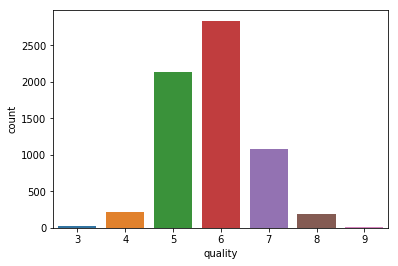

In [62]:
import seaborn as sns
sns.countplot(wines['quality'])

In [63]:
# Split the data into features and target label
yq = wines['quality_categorical']
Xq = wines.drop(['quality', 'quality_categorical'], axis = 1)

In [64]:
# train and test splitting the data
Xq_train, Xq_test, yq_train, yq_test = train_test_split(Xq, yq, test_size = 0.1, random_state = 101)

In [65]:
# Random forest Classifire

In [66]:
rfc=  RandomForestClassifier(n_estimators=200)
rfc.fit(Xq_train, yq_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
pred_rfc= rfc.predict(Xq_test)

In [68]:
# see our model acuracy
#print(classification_report(yq_test, pred_rfc))

In [69]:
print("Training set score: {:.2f}".format(rfc.score(Xq_train, yq_train)))
print("Test set score: {:.2f}".format(rfc.score(Xq_test, yq_test)))


Training set score: 1.00
Test set score: 0.87


random forest gives the accuracy of 87%

In [70]:
# Support vector Classifire
# Standradrized the model
Xq_train = StandardScaler().fit_transform(Xq_train)
Xq_test=StandardScaler().fit_transform(Xq_test)
from sklearn.svm import LinearSVC
svc= LinearSVC()
svc.fit(Xq_train, yq_train)
pred_svc = svc.predict(Xq_test)

In [71]:
pred_svc[:5]

array([1, 1, 2, 1, 1], dtype=int64)

In [72]:
yq_test[:5]

868     1
5097    1
5450    2
5850    1
2192    1
Name: quality_categorical, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [73]:
#print(classification_report(yq_test, pred_svc))

In [74]:
print("Training set score: {:.2f}".format(svc.score(Xq_train, yq_train)))
print("Test set score: {:.2f}".format(svc.score(Xq_test, yq_test)))

#print("Number of features used: {}".format(np.sum(svc.coef_ != 0)))

Training set score: 0.78
Test set score: 0.79


SVC gives the accuracy 79%

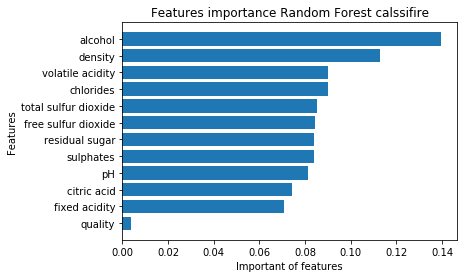

In [75]:
# important features of random forest
imp= rfc.feature_importances_
names=wines.columns
imp, names= zip(*sorted(zip(imp,names)))

plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)),names)
plt.xlabel('Important of features')
plt.ylabel('Features')
plt.title('Features importance Random Forest calssifire')
plt.show()